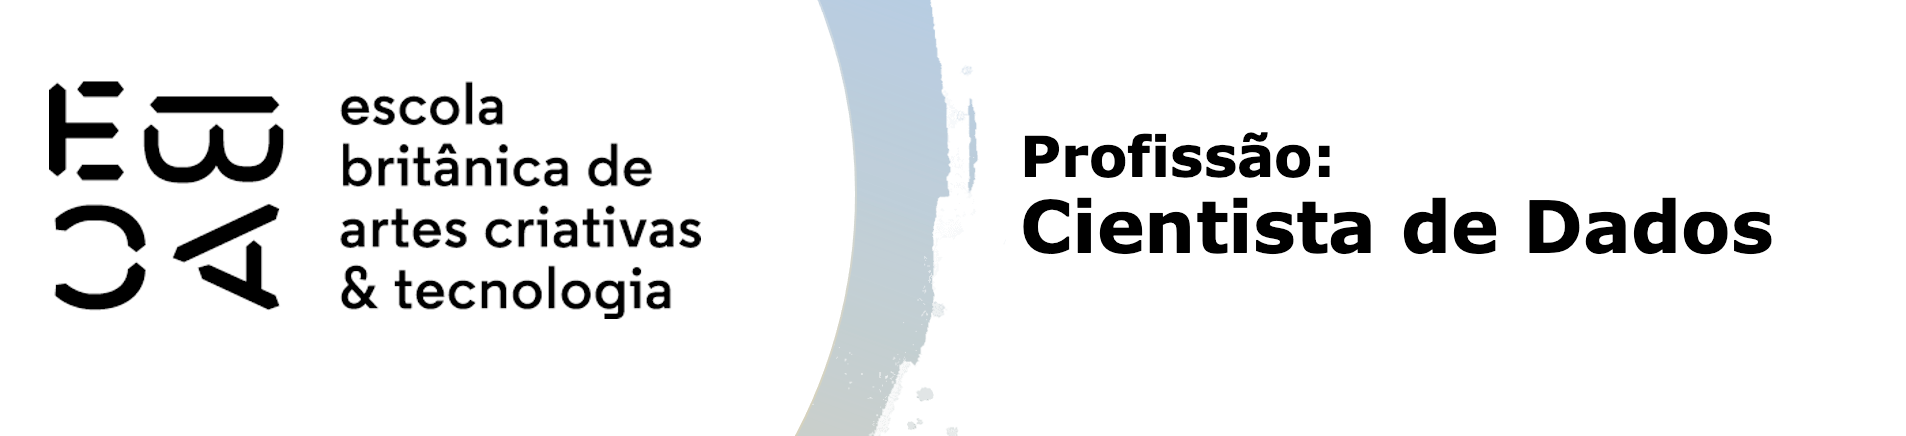

# Tarefa - Agrupamento hierárquico

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo agora é agrupar as sessões de acesso ao portal considerando o comportamento de acesso e informações da data, como a proximidade a uma data especial, fim de semana e o mês.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from gower import gower_matrix
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform

In [7]:
df = pd.read_csv('online_shoppers_intention.csv')

In [8]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [9]:
df.Revenue.value_counts(dropna=False)

False    10422
True      1908
Name: Revenue, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [11]:
df.nunique(axis=0)

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [12]:
df['SpecialDay'].unique()

array([0. , 0.4, 0.8, 1. , 0.2, 0.6])

In [13]:
df['SpecialDay'].value_counts()

0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

In [14]:
df['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [15]:
df['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [16]:
df['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

Text(0.5, 1.0, 'Month Count')

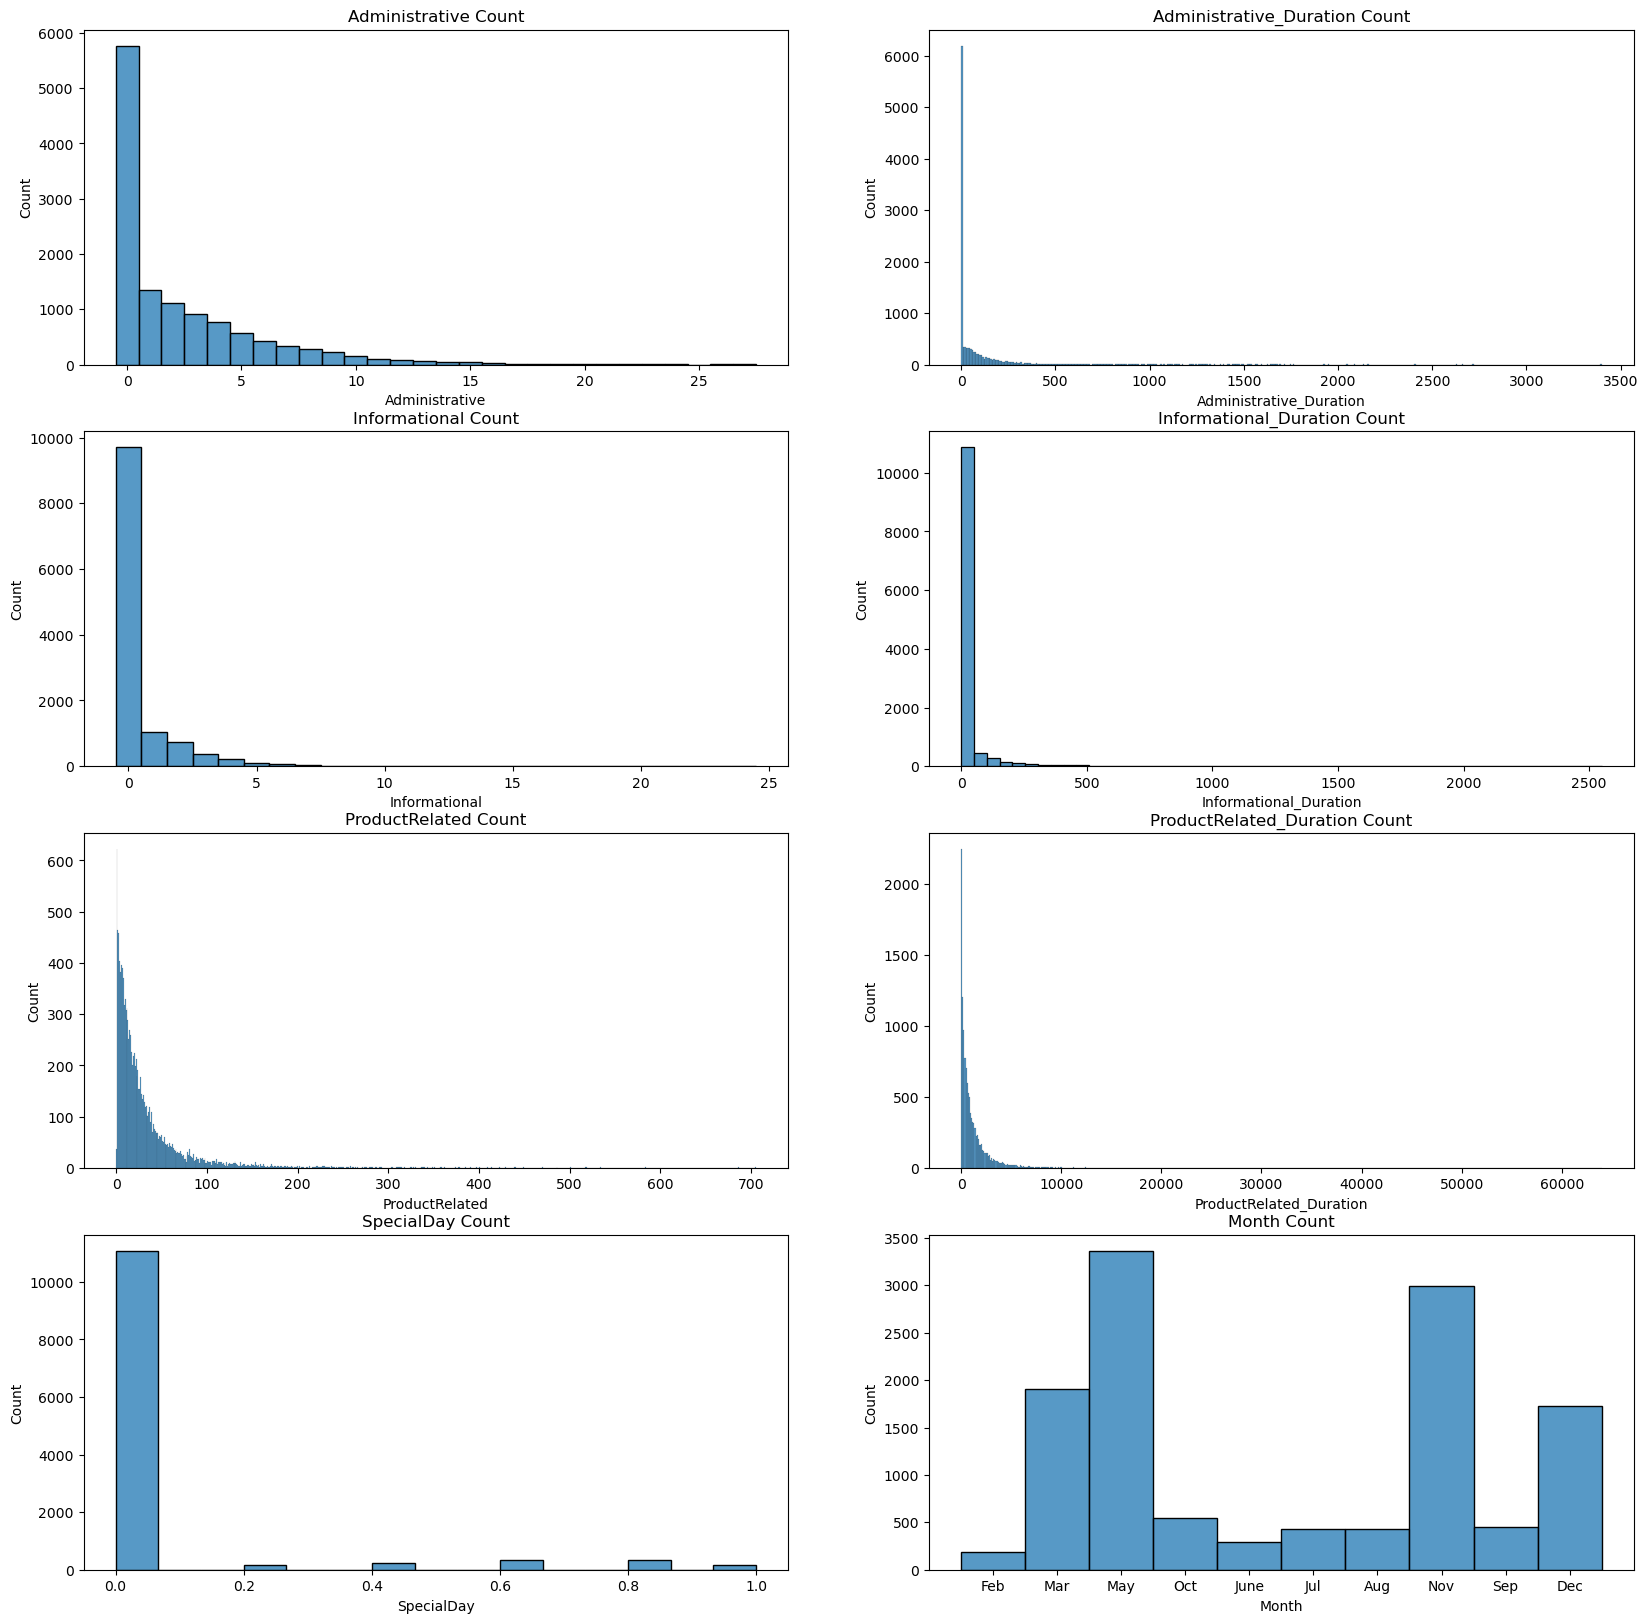

In [18]:
fig, axis = plt.subplots(4, 2, figsize=(20,20))

sns.histplot(data=df, x = "Administrative", discrete=True, ax=axis[0,0])
axis[0, 0].set_title("Administrative Count")

sns.histplot(data=df, x = "Administrative_Duration", ax=axis[0,1])
axis[0, 1].set_title("Administrative_Duration Count")

sns.histplot(data=df, x = "Informational", discrete=True, ax=axis[1,0])
axis[1, 0].set_title("Informational Count")

sns.histplot(data=df, x = "Informational_Duration", bins=50, ax=axis[1,1])
axis[1, 1].set_title("Informational_Duration Count")

sns.histplot(data=df, x = "ProductRelated", discrete=True, ax=axis[2,0])
axis[2, 0].set_title("ProductRelated Count")

sns.histplot(data=df, x = "ProductRelated_Duration", ax=axis[2,1])
axis[2, 1].set_title("ProductRelated_Duration Count")

sns.histplot(data=df, x = "SpecialDay", ax=axis[3,0])
axis[3, 0].set_title("SpecialDay Count")

sns.histplot(data=df, x = "Month", ax=axis[3,1])
axis[3, 1].set_title("Month Count")

Text(0.5, 1.0, 'Weekend Count')

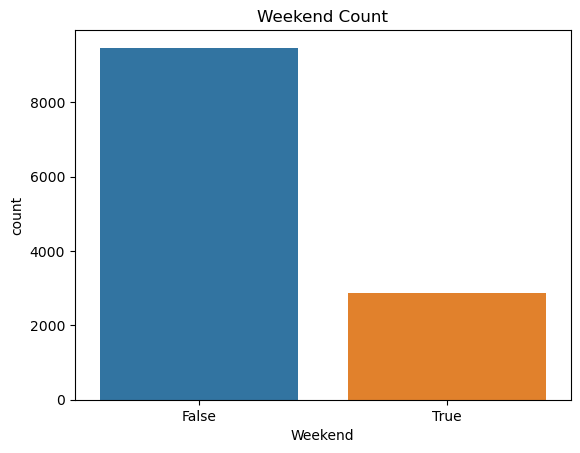

In [19]:
sns.countplot(data=df, x = 'Weekend').set_title("Weekend Count")

## Variáveis de agrupamento

Liste as variáveis que você vai querer utilizar. Essa é uma atividade importante do projeto, e tipicamente não a recebemos pronta. Não há resposta pronta ou correta, mas apenas critérios e a sua decisão. Os critérios são os seguintes:

- Selecione para o agrupamento variáveis que descrevam o padrão de navegação na sessão.
- Selecione variáveis que indiquem a característica da data.
- Não se esqueça de que você vai precisar realizar um tratamento especial para variáveis qualitativas.
- Trate adequadamente valores faltantes.

In [20]:
variaveis = ['Administrative', 'Administrative_Duration', 'Informational', 
             'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 
             'SpecialDay', 'Month', 'Weekend']
variaveis_qtd = ['Administrative', 'Administrative_Duration', 'Informational', 
             'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration']
variaveis_cat = ['SpecialDay', 'Month', 'Weekend']

In [21]:
df_pad = pd.DataFrame(StandardScaler().fit_transform(df[variaveis_qtd]), columns = df[variaveis_qtd].columns)

In [22]:
df_pad.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430


In [23]:
df_pad[variaveis_cat] = df[variaveis_cat]

In [24]:
df2 = pd.get_dummies(df_pad[variaveis].dropna(), columns=variaveis_cat)
df2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,SpecialDay_0.0,SpecialDay_0.2,SpecialDay_0.4,SpecialDay_0.6,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,Weekend_False,Weekend_True
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [25]:
df2.columns.values

array(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated',
       'ProductRelated_Duration', 'SpecialDay_0.0', 'SpecialDay_0.2',
       'SpecialDay_0.4', 'SpecialDay_0.6', 'SpecialDay_0.8',
       'SpecialDay_1.0', 'Month_Aug', 'Month_Dec', 'Month_Feb',
       'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov',
       'Month_Oct', 'Month_Sep', 'Weekend_False', 'Weekend_True'],
      dtype=object)

## Número de grupos

Nesta atividade vamos adotar uma abordagem bem pragmática e avaliar agrupamentos hierárquicos com 3 e 4 grupos, por estarem bem alinhados com uma expectativa e estratégia do diretor da empresa. 

*Atenção*: Cuidado se quiser fazer o dendrograma, pois com muitas observações ele pode ser mais complicado de fazer, e dependendo de como for o comando, ele pode travar o *kernell* do seu python.

## Avaliação dos grupos

Construa os agrupamentos com a técnica adequada que vimos em aula. Não se esqueça de tratar variáveis qualitativas, padronizar escalas das quantitativas, tratar valores faltantes e utilizar a distância correta.

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

In [26]:
vars_cat = [True if x in {'SpecialDay_0.0', 'SpecialDay_0.2',
       'SpecialDay_0.4', 'SpecialDay_0.6', 'SpecialDay_0.8',
       'SpecialDay_1.0', 'Month_Aug', 'Month_Dec', 'Month_Feb',
       'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov',
       'Month_Oct', 'Month_Sep', 'Weekend_False', 'Weekend_True'} else False for x in df2.columns]

In [27]:
df2.shape

(12330, 24)

In [28]:
distancia_gower = gower_matrix(df2, cat_features=vars_cat)

In [29]:
gdv = squareform(distancia_gower,force='tovector')

In [30]:
gdv.shape

(76008285,)

In [31]:
Z = linkage(gdv, method='complete')

In [32]:
df2['grupos_3'] = fcluster(Z, 3, criterion='maxclust')
df2.grupos_3.value_counts()

2    6657
1    2840
3    2833
Name: grupos_3, dtype: int64

In [33]:
df3 = df.join(df2['grupos_3'], how='left')

In [34]:
df3['grupos_3'].replace({1:"grupo_1", 3:"grupo_3", 2:"grupo_2"}, inplace=True)

<AxesSubplot:xlabel='BounceRates', ylabel='grupos_3'>

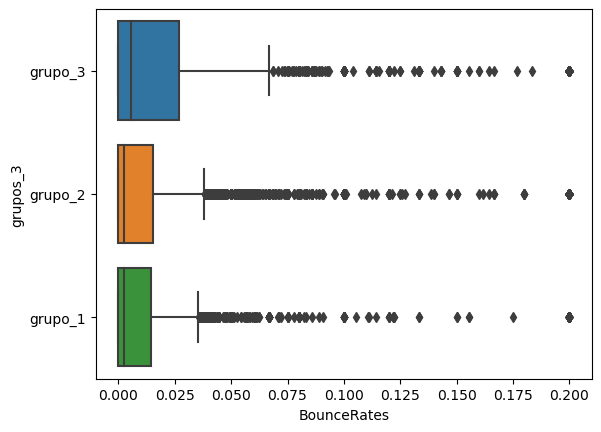

In [35]:
sns.boxplot(data=df3, y='grupos_3', x='BounceRates')

In [36]:
pd.crosstab(df3.Revenue, df3.grupos_3)

grupos_3,grupo_1,grupo_2,grupo_3
Revenue,,,
False,2342,5516,2564
True,498,1141,269


In [37]:
df2['grupos_4'] = fcluster(Z, 4, criterion='maxclust')
df2.grupos_4.value_counts()

2    6657
1    2840
3    2649
4     184
Name: grupos_4, dtype: int64

In [38]:
df3 = df.join(df2['grupos_4'], how='left')
df3['grupos_4'].replace({1:"grupo_1", 3:"grupo_3", 2:"grupo_2", 4:"grupo_4"}, inplace=True)

<AxesSubplot:xlabel='BounceRates', ylabel='grupos_4'>

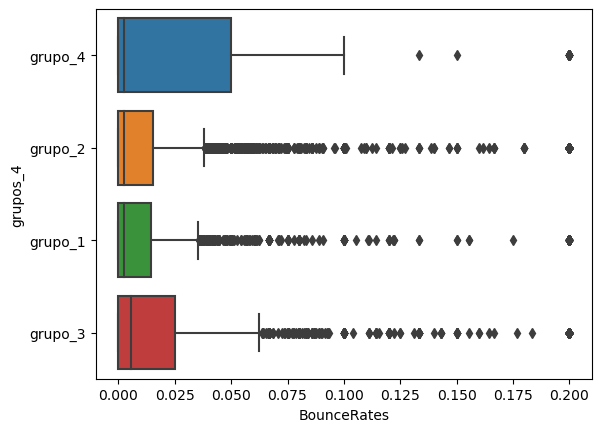

In [39]:
sns.boxplot(data=df3, y='grupos_4', x='BounceRates')

In [40]:
pd.crosstab(df3.Revenue, df3.grupos_4)

grupos_4,grupo_1,grupo_2,grupo_3,grupo_4
Revenue,,,,
False,2342,5516,2383,181
True,498,1141,266,3


In [41]:
df2['grupos_6'] = fcluster(Z, 6, criterion='maxclust')
df2.grupos_6.value_counts()

4    6655
1    2839
5    2649
6     184
3       2
2       1
Name: grupos_6, dtype: int64

In [42]:
df3 = df.join(df2['grupos_6'], how='left')
df3['grupos_6'].replace({1:"grupo_1", 3:"grupo_3", 2:"grupo_2", 4:"grupo_4", 5:"grupo_5", 6:"grupo_6"}, inplace=True)

<AxesSubplot:xlabel='BounceRates', ylabel='grupos_6'>

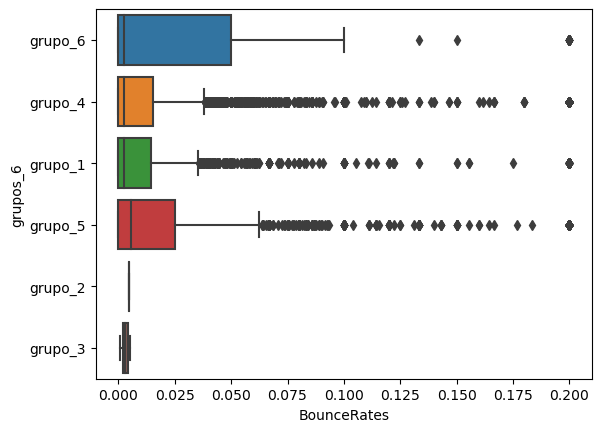

In [43]:
sns.boxplot(data=df3, y='grupos_6', x='BounceRates')

In [44]:
df2['grupos_2'] = fcluster(Z, 2, criterion='maxclust')
df2.grupos_2.value_counts()

2    9490
1    2840
Name: grupos_2, dtype: int64

In [45]:
df3 = df.join(df2['grupos_2'], how='left')
df3['grupos_2'].replace({1:"grupo_1", 2:"grupo_2"}, inplace=True)

<AxesSubplot:xlabel='BounceRates', ylabel='grupos_2'>

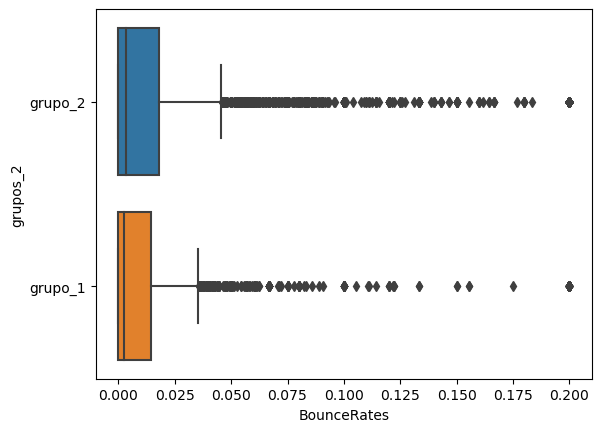

In [46]:
sns.boxplot(data=df3, y='grupos_2', x='BounceRates')

In [47]:
pd.crosstab(df3.Revenue, df3.grupos_2)

grupos_2,grupo_1,grupo_2
Revenue,,
False,2342,8080
True,498,1410


In [48]:
df2['grupos_3'] = fcluster(Z, 3, criterion='maxclust')
df3 = df.join(df2['grupos_3'], how='left')
df3['grupos_3'].replace({1:"grupo_1", 3:"grupo_3", 2:"grupo_2"}, inplace=True)

In [49]:
pd.crosstab(df3.Revenue, df3.grupos_3, normalize='columns')

grupos_3,grupo_1,grupo_2,grupo_3
Revenue,,,
False,0.824648,0.828601,0.905048
True,0.175352,0.171399,0.094952


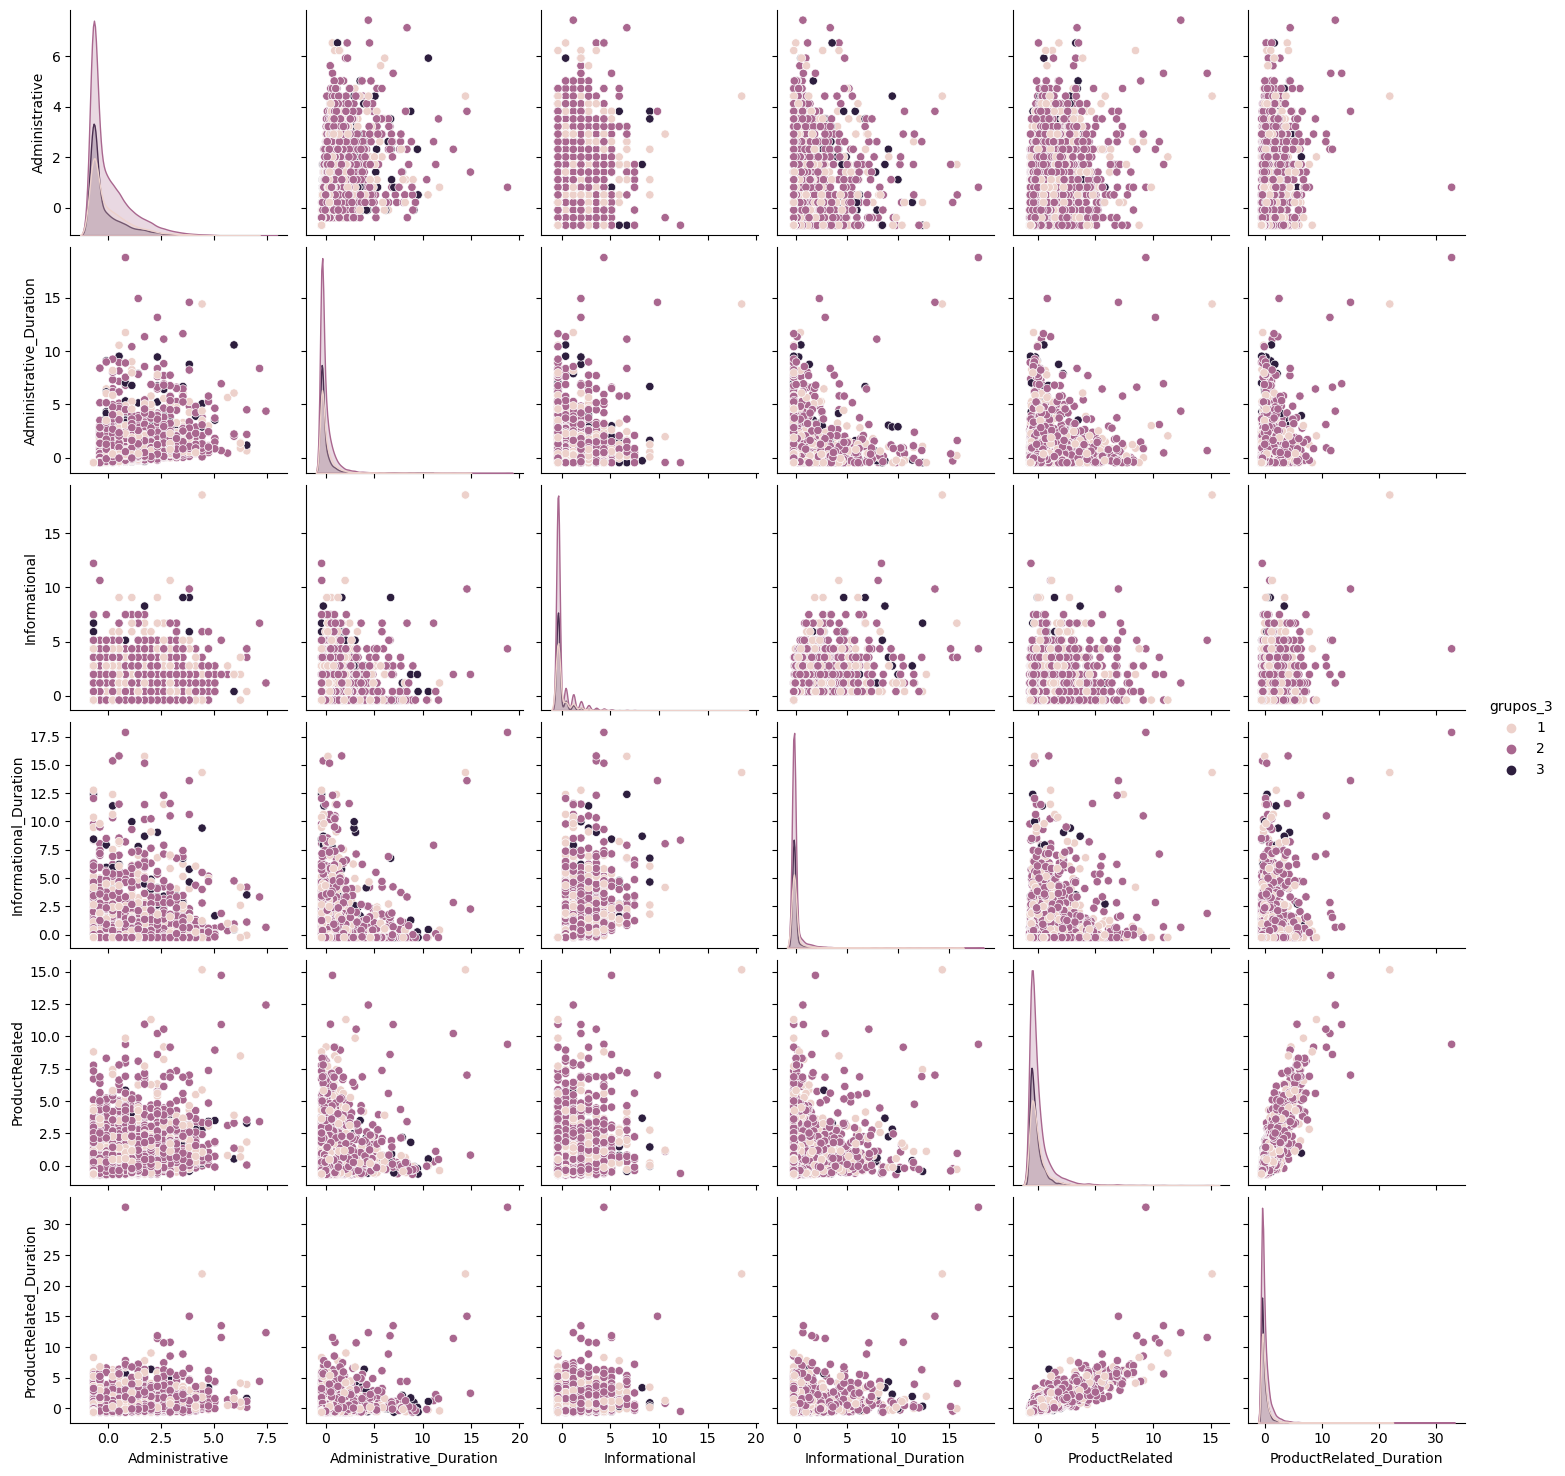

In [50]:
sns.pairplot(df2[['Administrative', 'Administrative_Duration', 'Informational', 
             'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'grupos_3']], hue='grupos_3')

Analisando os resultados aparentemente 3 grupos é um número bom, ao aumentarmos o número de grupos o algoritmo cria grupos muito pequenos que não influenciam muito em decisões, muito provavelmente agrupando outliers. Escolhendo o melhor agrupamento como sendo o de 3 grupos analisaremos mais profundamente o mesmo.



<AxesSubplot:xlabel='Weekend', ylabel='count'>

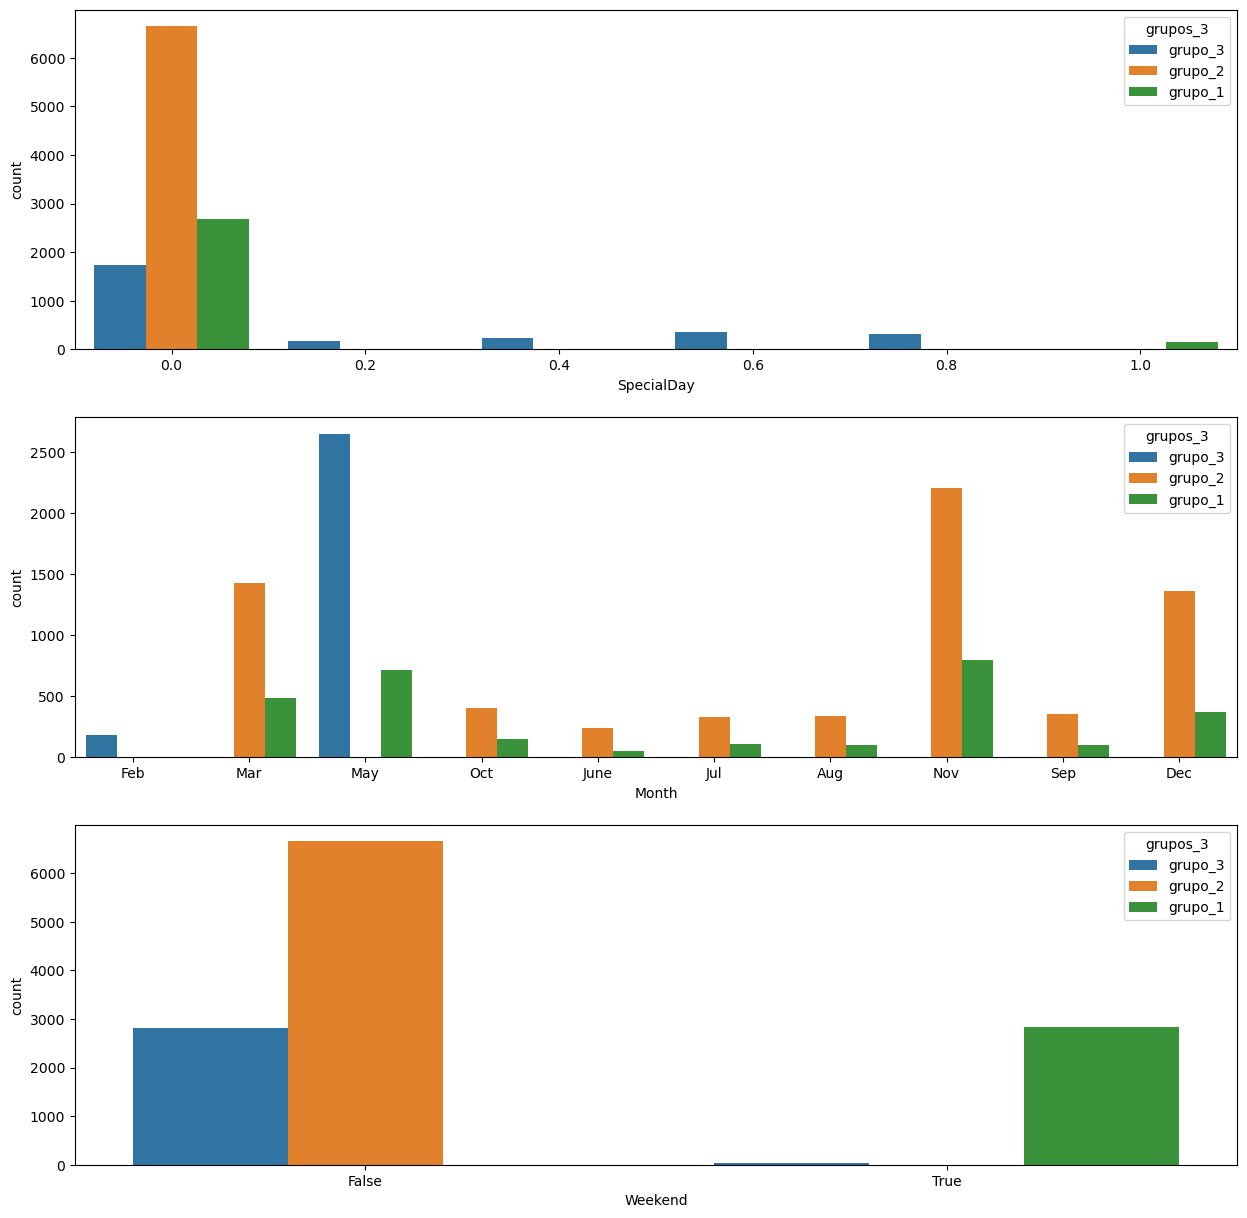

In [51]:
fig, axis = plt.subplots(3, 1, figsize=(15,15))

sns.countplot(data=df3, x = "SpecialDay", hue='grupos_3', ax=axis[0])

sns.countplot(data=df3, x = "Month", hue='grupos_3', ax=axis[1])

sns.countplot(data=df3, x = "Weekend", hue='grupos_3', ax=axis[2])

Observando o pairplot observamos que os grupos não foram separados por nenhuma das informações ali presentes, pois não percebemos nenhum padrão, na verdade o que parece ter maior peso é a variável Weekend, o que sugere que talvez a análise de 2 grupos apenas já seja útil, pois os grupos 2 e 3 parecem ser bem dificeis de se distinguir.


In [52]:
df2['grupos_2'] = fcluster(Z, 2, criterion='maxclust')
df3 = df.join(df2['grupos_2'], how='left')
df3['grupos_2'].replace({1:"grupo_1", 2:"grupo_2"}, inplace=True)

In [53]:
pd.crosstab(df3.Revenue, df3.grupos_2, normalize='columns')

grupos_2,grupo_1,grupo_2
Revenue,,
False,0.824648,0.851423
True,0.175352,0.148577


<AxesSubplot:xlabel='Weekend', ylabel='count'>

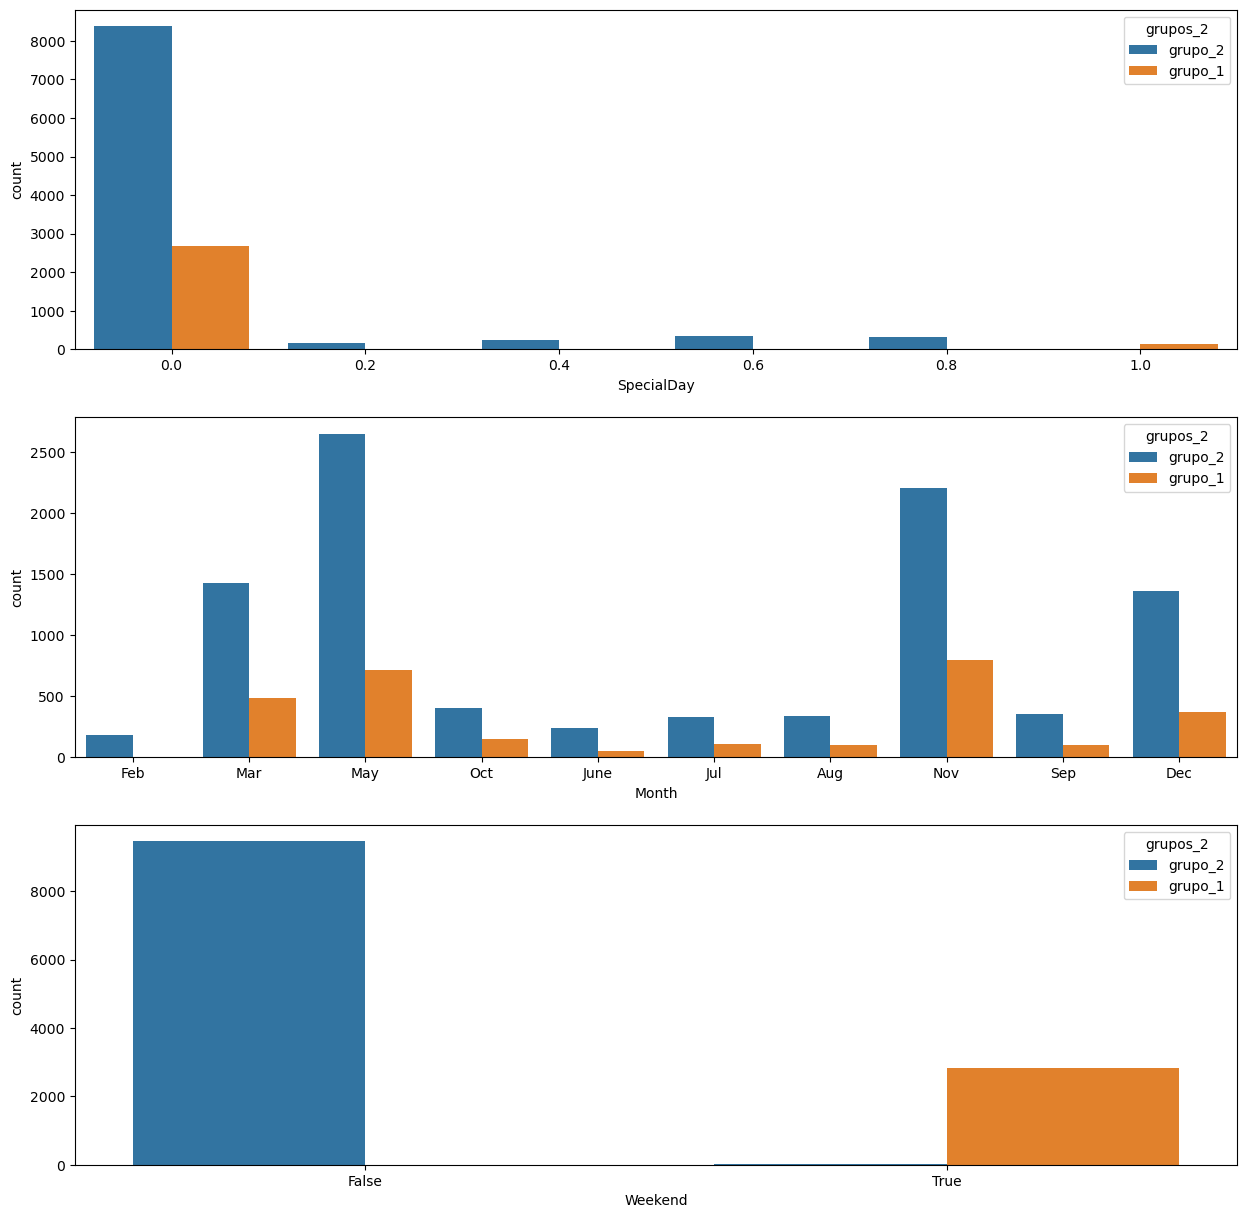

In [54]:
fig, axis = plt.subplots(3, 1, figsize=(15,15))

sns.countplot(data=df3, x = "SpecialDay", hue='grupos_2', ax=axis[0])

sns.countplot(data=df3, x = "Month", hue='grupos_2', ax=axis[1])

sns.countplot(data=df3, x = "Weekend", hue='grupos_2', ax=axis[2])

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

- Na análise de 2 grupos o grupo mais propenso a compra é o grupo_1 (maior porcentagem de Revenue = True e menores valores de Bounce Rate) que indica clientes que acessaram páginas aos finais de semana. (Na análise de 3 grupos chegamos a uma conclusão semelhante, o grupo de clientes que acessaram páginas aos finais de semana são mais propensos a compra).
